In [2]:
!pip install pandas numpy matplotlib seaborn



  Using cached numpy-2.3.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
     --- ------------------------------------ 10.2/110.1 kB ? eta -:--:--
     ---------- -------------------------- 30.7/110.1 kB 660.6 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/110.1 kB 495.5 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/110.1 kB 328.2 kB/s eta 0:00:01
     ------------------------------ ------ 92.2/110.1 kB 403.5 kB/s eta 0:00:01
     --------------------------------- -- 102.4/110.1 kB 393.8 kB/s eta 0:00:01
     ------------------------------------ 110.1/110.1 kB 336.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.3 MB ? eta -:--:--
   --------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
df = pd.read_csv('uber.csv')  # make sure the CSV is in the same directory

# 3. Display First 5 Rows
print("First 5 rows of the dataset:")
df.head()


Matplotlib is building the font cache; this may take a moment.


First 5 rows of the dataset:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# Dataset shape: rows and columns
print("Shape of the dataset (rows, columns):", df.shape)

# Column names
print("\nColumn names:")
print(df.columns)

# Data types and non-null counts
print("\nDataset information:")
df.info()

# Number of missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# Statistical summary of numeric columns
print("\nDescriptive statistics:")
print(df.describe())


Shape of the dataset (rows, columns): (200000, 9)

Column names:
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Mi

In [5]:
# Check again for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Drop rows with missing values (you can also consider imputing if needed)
df_cleaned = df.dropna()

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Check the shape after cleaning
print("\nAfter cleaning:")
print("New shape:", df_cleaned.shape)
print("Missing values:", df_cleaned.isnull().sum())


Missing values before cleaning:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

After cleaning:
New shape: (199999, 9)
Missing values: Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [6]:
# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("uber_cleaned.csv", index=False)
print("✅ Cleaned dataset exported successfully as 'uber_cleaned.csv'")


✅ Cleaned dataset exported successfully as 'uber_cleaned.csv'


In [8]:
# Use only numeric columns for quantiles
numeric_df = df.select_dtypes(include='number')

# Mean, median, mode, standard deviation
print("Mean:\n", numeric_df.mean())
print("\nMedian:\n", numeric_df.median())
print("\nMode:\n", numeric_df.mode().iloc[0])
print("\nStandard Deviation:\n", numeric_df.std())

# Quartiles
print("\nQuantiles (25%, 50%, 75%):")
print(numeric_df.quantile([0.25, 0.5, 0.75]))

# Range
print("\nRanges:")
for column in numeric_df.columns:
    col_range = numeric_df[column].max() - numeric_df[column].min()
    print(f"{column}: {col_range}")


Mean:
 Unnamed: 0           2.771248e+07
fare_amount          1.135989e+01
pickup_longitude    -7.252763e+01
pickup_latitude      3.993588e+01
dropoff_longitude   -7.252529e+01
dropoff_latitude     3.992389e+01
passenger_count      1.684543e+00
dtype: float64

Median:
 Unnamed: 0           2.774524e+07
fare_amount          8.500000e+00
pickup_longitude    -7.398182e+01
pickup_latitude      4.075259e+01
dropoff_longitude   -7.398009e+01
dropoff_latitude     4.075304e+01
passenger_count      1.000000e+00
dtype: float64

Mode:
 Unnamed: 0           1.0
fare_amount          6.5
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      1.0
Name: 0, dtype: float64

Standard Deviation:
 Unnamed: 0           1.601386e+07
fare_amount          9.901760e+00
pickup_longitude     1.143782e+01
pickup_latitude      7.720558e+00
dropoff_longitude    1.311741e+01
dropoff_latitude     6.794829e+00
passenger_count      1.385995e+00
dtype: flo

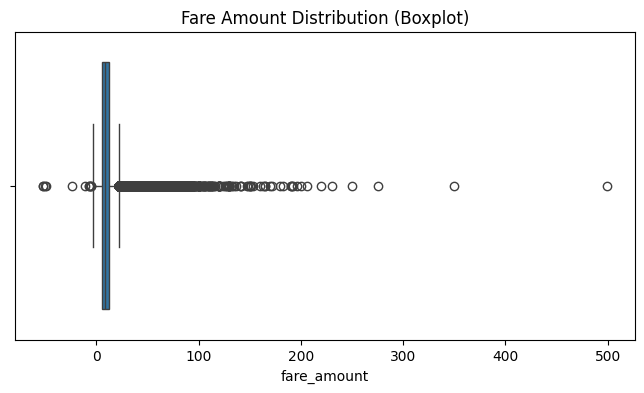

In [9]:
# Boxplot for fare amount
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='fare_amount')
plt.title('Fare Amount Distribution (Boxplot)')
plt.show()


In [10]:
if 'distance' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='distance', y='fare_amount')
    plt.title('Fare Amount vs Distance')
    plt.xlabel('Distance')
    plt.ylabel('Fare Amount')
    plt.show()
else:
    print("⚠️ 'distance' column not found in the dataset.")


⚠️ 'distance' column not found in the dataset.


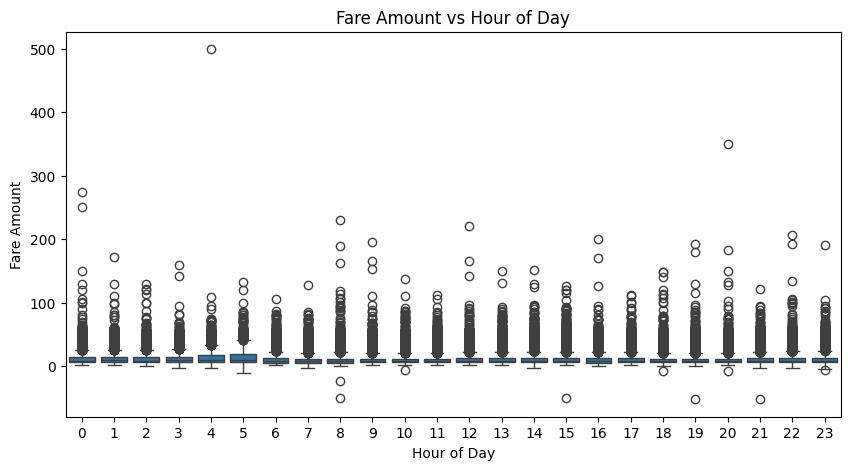

In [11]:
# Convert timestamp column to datetime
if 'pickup_datetime' in df.columns:
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
    df['hour'] = df['pickup_datetime'].dt.hour

    # Plot fare by hour
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='hour', y='fare_amount')
    plt.title('Fare Amount vs Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Fare Amount')
    plt.show()
else:
    print("⚠️ 'pickup_datetime' column not found.")


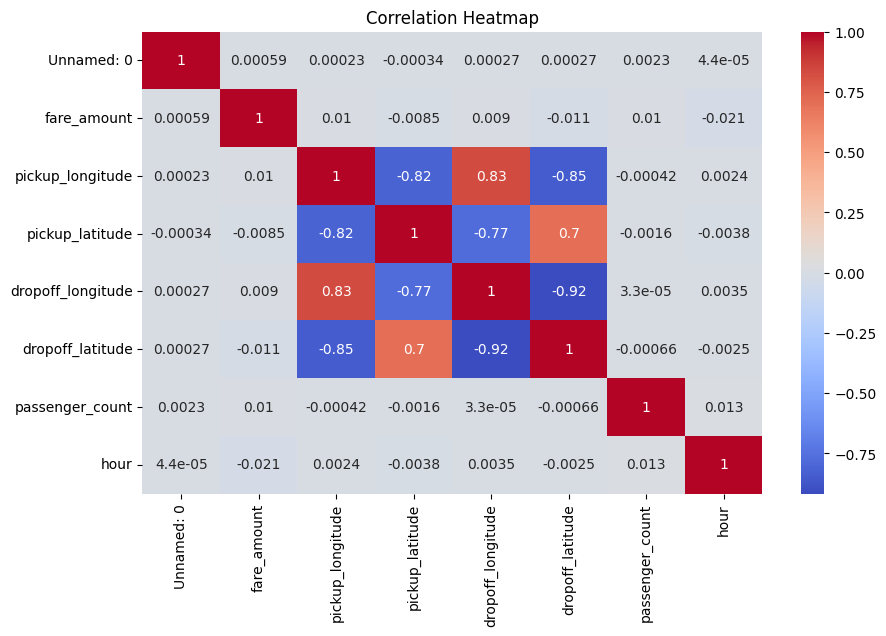

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# First, make sure 'pickup_datetime' exists and is in datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Drop rows with invalid datetime
df = df.dropna(subset=['pickup_datetime'])

# Extract features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Categorize day names
df['day_name'] = df['pickup_datetime'].dt.day_name()

# Peak hours: define 7–9 AM and 4–7 PM as peak
df['peak_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

# Weekend indicator
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [14]:
# Save dataset with new features
df.to_csv("uber_enhanced.csv", index=False)
print("✅ Enhanced dataset saved as 'uber_enhanced.csv'")


✅ Enhanced dataset saved as 'uber_enhanced.csv'
